In [2]:
import numpy as np
np.random.seed(42)

import tensorflow as tf
tf.random.set_seed(42)

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import boston_housing

(x_train_full, y_train_full), (x_test, y_test) = boston_housing.load_data(test_split = 0.2, seed = 113)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size = 0.1, random_state = 42)

print (x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train) # Fit ONLY the training data!

# Transform all the datasets.
x_train_scaled = scaler.transform(x_train) 
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled  = scaler.transform(x_test)

57026/57026 [==============================] - 0s 1us/step
(363, 13) (363,) (41, 13) (41,) (102, 13) (102,)


In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

class nnmodel():

  def __init__(self,nodes,loss = "mse",optimizer = "adam",epochs = 100,callbacks = ""):

    self.callbacks = callbacks
    self.optimizer = optimizer
    self.loss = loss
    self.epochs = epochs

    self.model = Sequential()

    self.model.add((Dense(13, activation = "relu", input_shape = x_train.shape[1:])))
    for num , activation in nodes:
      self.model.add((Dense(num, activation = activation)))

    self.model.add(Dense(1))

  def train(self):
    np.random.seed(42)
    tf.random.set_seed(42)

    self.model.compile( loss = self.loss, optimizer = self.optimizer )

    self.model.history = self.model.fit(x_train_scaled, y_train, epochs = self.epochs, validation_data = (x_valid_scaled, y_valid) , callbacks = self.callbacks, verbose = 1, shuffle = False)

  def summary(self):
    self.model.summary()

  def plot(self):
    plt.rcParams.update({'font.size': 18})

    fig = plt.figure( figsize = (12,8) )

    plt.plot( self.model.history.history["loss"],     "r-", label = "Loss")
    plt.plot( self.model.history.history["val_loss"], "b-", label = "Valid Loss")

    plt.ylabel("Error (log scale)")
    plt.xlabel("Epochs")

    # Use log scale for the y-axis.
    plt.yscale("log")

    plt.grid()
    plt.legend()
    plt.show()
  def eval(self):
    self.mse = self.model.evaluate(x_test_scaled, y_test, verbose = 0)
    print ("Evaluation :", self.mse)


Report the performance of each model tried here.

Epoch 1/1000


2022-05-31 02:05:28.809968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 02:05:28.810473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-31 02:05:28.810574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-31 02:05:28.810645: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-31 02:05:28.810715: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

12/12 [==============================] - 1s 44ms/step - loss: 252.5328 - val_loss: 101.4232
Epoch 2/1000
12/12 [==============================] - 0s 31ms/step - loss: 75.9889 - val_loss: 53.4852
Epoch 3/1000
12/12 [==============================] - 0s 33ms/step - loss: 42.4023 - val_loss: 30.3754
Epoch 4/1000
12/12 [==============================] - 0s 35ms/step - loss: 28.5925 - val_loss: 22.6543
Epoch 5/1000
12/12 [==============================] - 0s 34ms/step - loss: 23.1350 - val_loss: 18.7674
Epoch 6/1000
12/12 [==============================] - 0s 28ms/step - loss: 20.1418 - val_loss: 16.0708
Epoch 7/1000
12/12 [==============================] - 0s 29ms/step - loss: 17.6584 - val_loss: 13.5519
Epoch 8/1000
12/12 [==============================] - 0s 28ms/step - loss: 15.5805 - val_loss: 12.5054
Epoch 9/1000
12/12 [==============================] - 0s 29ms/step - loss: 14.0750 - val_loss: 11.2736
Epoch 10/1000
12/12 [==============================] - 0s 28ms/step - loss: 12.7964 

12/12 [==============================] - 0s 29ms/step - loss: 5.0597 - val_loss: 12.3195
Epoch 81/1000
12/12 [==============================] - 0s 28ms/step - loss: 5.9514 - val_loss: 16.5292
Epoch 82/1000
12/12 [==============================] - 0s 28ms/step - loss: 7.4775 - val_loss: 17.5315
Epoch 83/1000
12/12 [==============================] - 0s 28ms/step - loss: 5.6311 - val_loss: 13.5502
Epoch 84/1000
12/12 [==============================] - 0s 27ms/step - loss: 3.8022 - val_loss: 10.4031
Epoch 85/1000
12/12 [==============================] - 0s 28ms/step - loss: 2.6881 - val_loss: 14.2609
Epoch 86/1000
12/12 [==============================] - 0s 28ms/step - loss: 2.3482 - val_loss: 13.3531
Epoch 87/1000
12/12 [==============================] - 0s 29ms/step - loss: 1.9037 - val_loss: 12.2877
Epoch 88/1000
12/12 [==============================] - 0s 29ms/step - loss: 1.5544 - val_loss: 12.6449
Epoch 89/1000
12/12 [==============================] - 0s 29ms/step - loss: 1.5009 - va

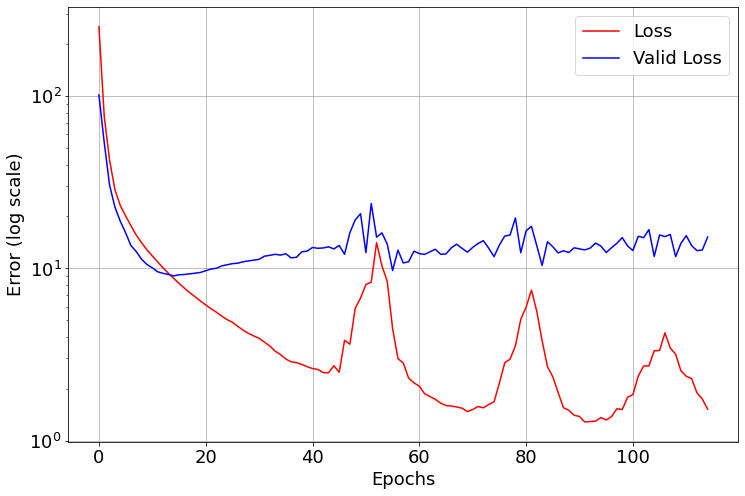

Evaluation : 25.24820899963379


In [4]:
nodes = [(1000,"relu"),(2000,"relu"),(1000,"relu")]
early_stopping = EarlyStopping(patience = 100, restore_best_weights = True)
model1 = nnmodel(nodes = nodes, callbacks = early_stopping, epochs = 1000)
model1.train()
model1.plot()
model1.eval()